In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [2]:
dt_assessments = pd.read_csv("dataset/assessments.csv")
dt_courses = pd.read_csv("dataset/courses.csv")
dt_studentAssesment = pd.read_csv("dataset/assessments.csv")
dt_studentInfo = pd.read_csv("dataset/studentInfo.csv")
dt_studentRegistration = pd.read_csv("dataset/studentRegistration.csv")
dt_studentVle = pd.read_csv("dataset/studentVle.csv")
dt_vle = pd.read_csv("dataset/vle.csv")

In [8]:
def find_null(data):
    na_data = {"columns" : [], "null_values (sum)": [], "null_values (%)": []}
    for col in data.columns:
        sum_value= data[col].isnull().sum()
        values = 100*(sum_value/data[col].shape[0])
        if values != 0:
            na_data["columns"].append(col)
            na_data["null_values (sum)"].append(sum_value)
            na_data["null_values (%)"].append(values)
    df_na_data = pd.DataFrame(data=na_data)
    return df_na_data

## Assessments

### Top and Last 5 data

In [3]:
dt_assessments.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0


In [4]:
dt_assessments.tail()

,code_module,code_presentation,id_assessment,assessment_type,date,weight
201,GGG,2014J,37443,CMA,229.0,0.0
202,GGG,2014J,37435,TMA,61.0,0.0
203,GGG,2014J,37436,TMA,124.0,0.0
204,GGG,2014J,37437,TMA,173.0,0.0
205,GGG,2014J,37444,Exam,229.0,100.0


In [5]:
dt_assessments.shape

(206, 6)

In [9]:
display(find_null(dt_assessments))

,columns,null_values (sum),null_values (%)
0,date,11,5.339806


<AxesSubplot: xlabel='assessment_type', ylabel='Count'>

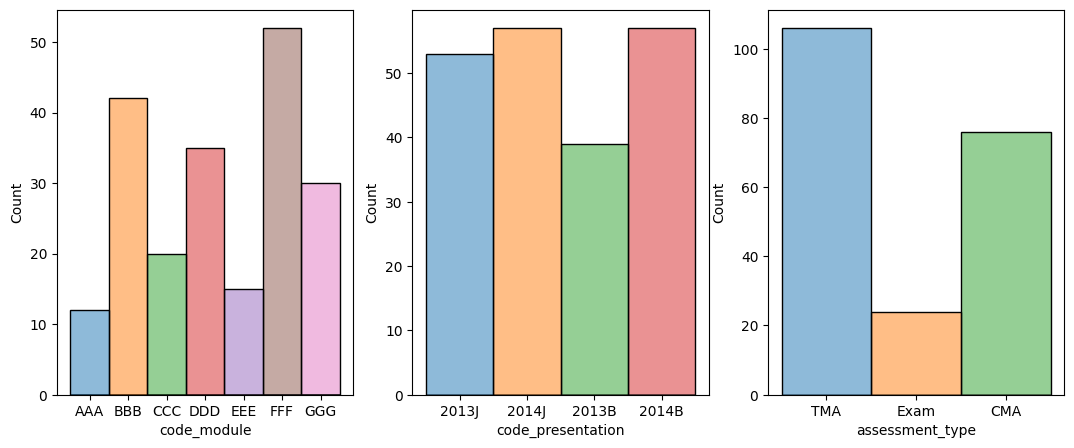

In [15]:
fig, ax = plt.subplots(1, 3, figsize=(13,5))
sns.histplot(dt_assessments, x="code_module", hue="code_module", ax=ax[0], legend=False)
sns.histplot(dt_assessments, x="code_presentation", hue="code_presentation", ax=ax[1], legend=False)
sns.histplot(dt_assessments, x="assessment_type", hue="assessment_type", ax=ax[2], legend=False)

**Group by Year**

C:\Users\IrulTyo\AppData\Local\Temp\ipykernel_2508\3543308164.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')


<AxesSubplot: xlabel='weight', ylabel='count'>

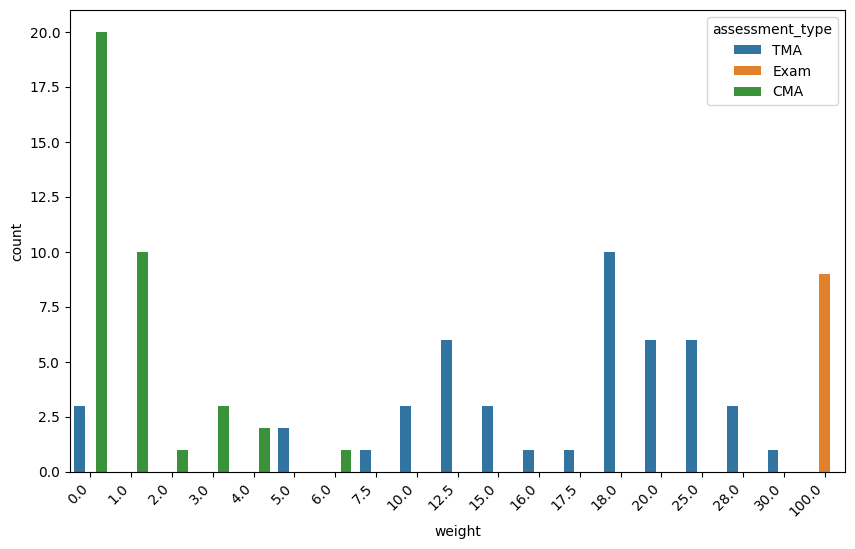

In [26]:
dt_assessments_2013 = dt_assessments[dt_assessments.code_presentation.str.contains("2013")]
fig, ax = plt.subplots(1,1, figsize=(10,6))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
sns.countplot(dt_assessments_2013, x="weight", hue="assessment_type", ax=ax)

In [36]:
dt_assessments_2013[(dt_assessments_2013.assessment_type == "CMA") & (dt_assessments_2013.weight == 0.0)].count()

code_module          20
code_presentation    20
id_assessment        20
assessment_type      20
date                 20
weight               20
dtype: int64